In [38]:
!pip install geopandas
!pip install pycountry
!pip install geodatasets

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pycountry
import geopandas as gpd
import geodatasets


C:\Users\darre\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
df = pd.read_csv("LPs.csv")

In [5]:
df.head(10)

,Artist,Name,Date,LP Colour,Splatter/Marble,10inch,12inch,Gatefold,Sleeve,Tracks,Label,File by Surname,The,Signed,Numbered,Bootleg,Country
0,Absent in Body,Plague God,2022,Red,NaN,NaN,1.0,Y,Black,14,Relapse,NaN,NaN,NaN,NaN,NaN,USA
1,Afghan Whigs,Gentlemen,1993,Yellow,NaN,NaN,1.0,NaN,Yellow,11,Sub Pop,NaN,Y,NaN,NaN,NaN,USA
2,Afghan Whigs,Black Love,1996,Black,NaN,NaN,1.0,Y,Black,11,Warner,NaN,Y,NaN,NaN,NaN,USA
3,Afghan Whigs,How Do You Burn?,2022,Pink,NaN,NaN,1.0,Y,Black,10,Royal Cream,NaN,Y,NaN,NaN,NaN,USA
4,AFI,Black Sails in the Sunset,1999,Orange,NaN,NaN,1.0,NaN,Multi,16,Nitro,NaN,NaN,NaN,NaN,NaN,USA
5,AFI,All Hallow's EP,1999,Pink,NaN,1.0,NaN,NaN,Multi,4,Nitro,NaN,NaN,NaN,NaN,NaN,USA
6,AFI,Sing the Sorrow,2003,Black,NaN,NaN,2.0,Y,Black,13,Geffen,NaN,NaN,NaN,NaN,NaN,USA
7,AFI,Silver Bleeds The Black Sun...,2025,Pink,Y,NaN,1.0,Y,Pink,10,Run for Cover,NaN,NaN,NaN,NaN,NaN,USA
8,Alexisonfire,Otherness,2022,Purple Red,NaN,NaN,2.0,Y,White,10,Dine Alone,NaN,NaN,NaN,NaN,NaN,USA
9,Alice in Chains,Facelift,1990,Black,NaN,NaN,2.0,NaN,Multi,12,Columbia,NaN,NaN,NaN,NaN,NaN,USA


In [4]:
df.tail()

,Artist,Name,Date,LP Colour,Splatter/Marble,10inch,12inch,Gatefold,Sleeve,Tracks,Label,File by Surname,The,Signed,Numbered,Bootleg,Country
407,Youth Code,"Yours, With Malice",2025,Blue,NaN,NaN,1.0,NaN,Blue,5,Sumerian,NaN,NaN,NaN,NaN,NaN,USA
408,Zeal & Ardor,Stranger Fruit,2018,Purple,NaN,NaN,2.0,Y,Purple,16,MVKA,NaN,NaN,NaN,NaN,NaN,Switzerland
409,Zeal & Ardor,Wake of a Nation,2020,Transparent,NaN,NaN,1.0,NaN,Black,6,MVKA,NaN,NaN,NaN,NaN,NaN,Switzerland
410,Zeal & Ardor,Zeal & Ardor,2022,White,NaN,NaN,1.0,NaN,Black,14,MVKA,NaN,NaN,NaN,NaN,NaN,Switzerland
411,Zeal & Ardor,Greif,2024,Transparent,NaN,NaN,1.0,NaN,Black,14,Redacted,NaN,NaN,NaN,NaN,NaN,Switzerland


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Artist           407 non-null    object 
 1   Name             389 non-null    object 
 2   Date             411 non-null    int64  
 3   LP Colour        411 non-null    object 
 4   Splatter/Marble  51 non-null     object 
 5   10inch           8 non-null      float64
 6   12inch           405 non-null    float64
 7   Gatefold         139 non-null    object 
 8   Sleeve           410 non-null    object 
 9   Tracks           411 non-null    int64  
 10  Label            391 non-null    object 
 11  File by Surname  39 non-null     float64
 12  The              43 non-null     object 
 13  Signed           10 non-null     object 
 14  Numbered         10 non-null     object 
 15  Bootleg          2 non-null      object 
 16  Country          407 non-null    object 
 17  Unnamed: 17     

In [10]:
df['LP Colour'].unique()

array(['Red', 'Yellow', 'Black', 'Pink', 'Orange', 'Purple Red', 'Cream',
       'Grey', 'Gold', 'Grey Black', 'Transparent', 'White',
       'Orange Blue Transparent', 'Green', 'Gold Grey', 'Blue',
       'Grey Blue', 'Black Blue Pink', 'Purple Transparent', 'Green Red',
       'Pink ', 'Purple', 'Gold Pink', 'Silver', 'Gold Transparent',
       'Orange Pink', 'Green Gold', 'Yellow Black Transparent',
       'White Green', 'Black White', 'Picture', 'Yellow Red', 'Blue Red',
       'Orange Gold Brown', 'Blue Black', 'Brown'], dtype=object)

In [11]:
df['Tracks'].count

<bound method Series.count of 0      14
1      11
2      11
3      10
4      16
       ..
406     5
407    16
408     6
409    14
410    14
Name: Tracks, Length: 411, dtype: int64>

In [29]:
#sns.pairplot(df)

<Axes: xlabel='Tracks', ylabel='Count'>

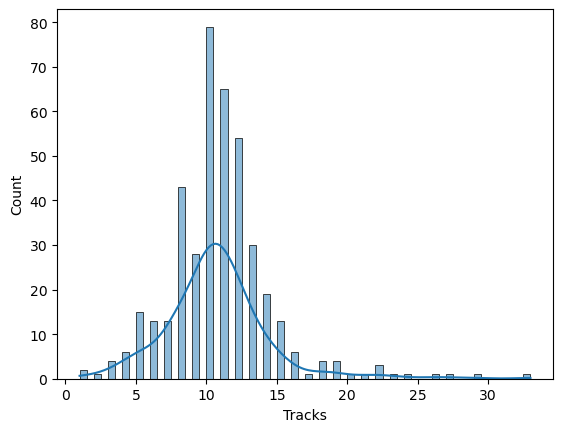

In [8]:
sns.histplot(data = df, x = "Tracks", binwidth = 0.5, kde=True)

In [9]:
df.describe()

,Date,10inch,12inch,Tracks,File by Surname,Unnamed: 17
count,411.000000,8.0,405.000000,411.000000,39.000000,0.0
mean,2008.155718,1.0,1.239506,10.739659,2.102564,NaN
std,15.449527,0.0,0.481766,3.758290,0.307355,NaN
min,1949.000000,1.0,1.000000,1.000000,2.000000,NaN
25%,1995.000000,1.0,1.000000,9.000000,2.000000,NaN
50%,2015.000000,1.0,1.000000,11.000000,2.000000,NaN
75%,2021.000000,1.0,1.000000,12.000000,2.000000,NaN
max,2025.000000,1.0,4.000000,33.000000,3.000000,NaN


In [12]:
df['Name'] = df['Name'].fillna(df['Artist'])

In [13]:
import nltk

from nltk.sentiment import SentimentIntensityAnalyzer

In [14]:
def get_sentiment(text):
    sia=SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    
    compound_score = sentiment_scores["compound"]
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"
    

In [15]:
df_s = df['Name'].apply(get_sentiment)

In [16]:
df_s

0      Positive
1       Neutral
2      Positive
3       Neutral
4       Neutral
         ...   
406     Neutral
407     Neutral
408     Neutral
409     Neutral
410     Neutral
Name: Name, Length: 411, dtype: object

In [17]:
feeling = df_s.value_counts()
print(feeling)

Neutral     291
Negative     70
Positive     50
Name: Name, dtype: int64


In [38]:
#df_a = df['Artist'].apply(get_sentiment)

#feeling2 = df_a.value_counts()
#print(feeling)


In [18]:
multi = "Other"

def count_words(text):
    return len(str(text).split())

df['LP Colour'] = df['LP Colour'].apply(
    lambda x: multi if count_words(x) > 1 else x
)
    
    

In [19]:
df['LP Colour'] = df['LP Colour'].str.lower().str.replace(' ', '')

from matplotlib.colors import CSS4_COLORS

valid_colours = set(CSS4_COLORS.keys())

valid_colour_names = []
invalid_colour_names = []

for color in df['LP Colour']:
    if color in valid_colours:
        valid_colour_names.append(color)
    else:
        invalid_colour_names.append(color)

print(f"Valid color names: {set(valid_colour_names)}")
print(f"Invalid color names: {set(invalid_colour_names)}")

Valid color names: {'red', 'yellow', 'gold', 'black', 'purple', 'silver', 'orange', 'pink', 'blue', 'grey', 'green', 'brown', 'white'}
Invalid color names: {'other', 'transparent', 'picture', 'cream'}


In [20]:
df['Sleeve'] = df['Sleeve'].str.lower().str.replace(' ', '')

valid_colours = set(CSS4_COLORS.keys())

valid_colour_names = []
invalid_colour_names = []


for color in df['Sleeve']:
    if color in valid_colours:
        valid_colour_names.append(color)
    else:
        invalid_colour_names.append(color)

print(f"Valid color names: {set(valid_colour_names)}")
print(f"Invalid color names: {set(invalid_colour_names)}")

Valid color names: {'yellow', 'red', 'purple', 'black', 'gold', 'silver', 'orange', 'pink', 'blue', 'maroon', 'grey', 'green', 'yellowgreen', 'brown', 'beige', 'white'}
Invalid color names: {'multi', 'greeb', nan, 'copper', 'cream'}


In [21]:
colour_mapping = {
    'cream': 'beige', 
    'transparent': 'lightgrey',  
    'picture': 'antiquewhite',
    'other': 'antiquewhite',
    'grey': 'darkgrey',
    'greeb': 'green',
    'nan': 'lightgrey',
    'copper': 'orange',
    'multi': 'black'
}

df['Sleeve'] = df['Sleeve'].replace(colour_mapping)
df['LP Colour'] = df['LP Colour'].replace(colour_mapping)

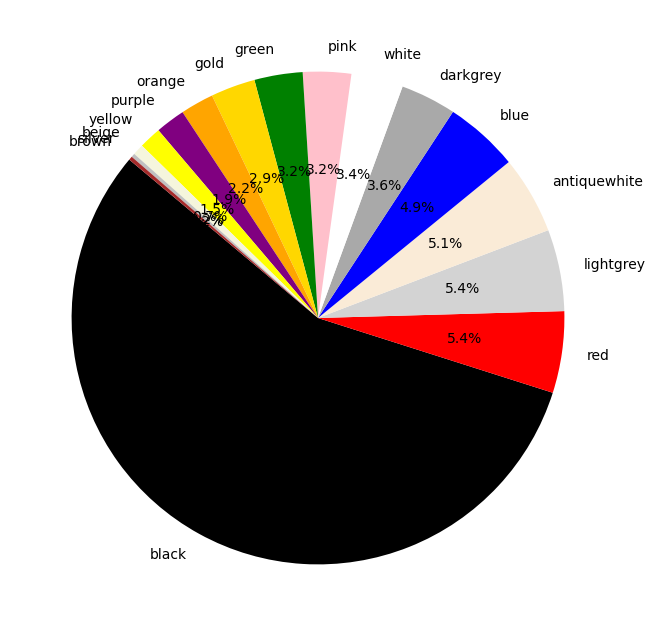

In [26]:
colour_counts = df['LP Colour'].value_counts()

colour_names = colour_counts.index

# Generate the pie chart
plt.figure(figsize=(8, 8))
plt.pie(colour_counts, labels=colour_counts.index, autopct='%1.1f%%', startangle=140, colors=colour_names)
#plt.title(f'Pie Chart of {'LP Colour'}')
plt.show()

In [23]:
multi = "Multi"

def count_words(text):
    return len(str(text).split())

df['Sleeve'] = df['Sleeve'].apply(
    lambda x: multi if count_words(x) > 1 else x
)
    

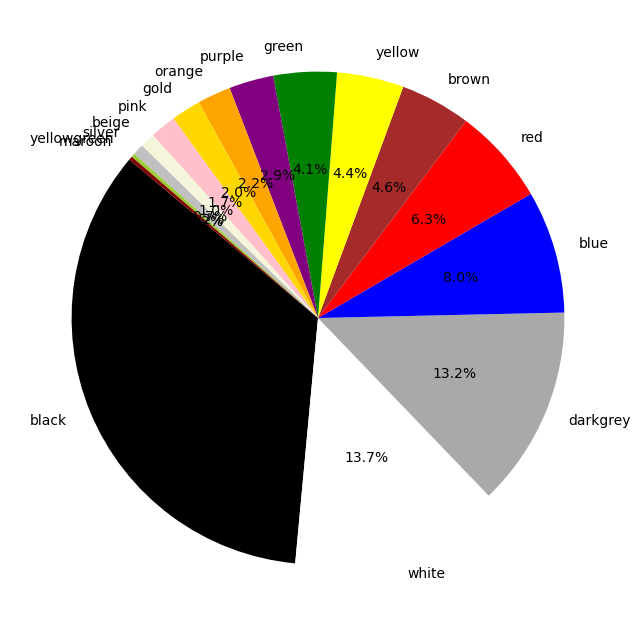

In [24]:
colour_counts = df['Sleeve'].value_counts()
colour_names = colour_counts.index

# Generate the pie chart
plt.figure(figsize=(8, 8))
plt.pie(colour_counts, labels=colour_counts.index, autopct='%1.1f%%', startangle=140, colors=colour_names)
#plt.title(f'Pie Chart of {'LP Colour'}')
plt.show()

<Axes: xlabel='12inch', ylabel='Tracks'>

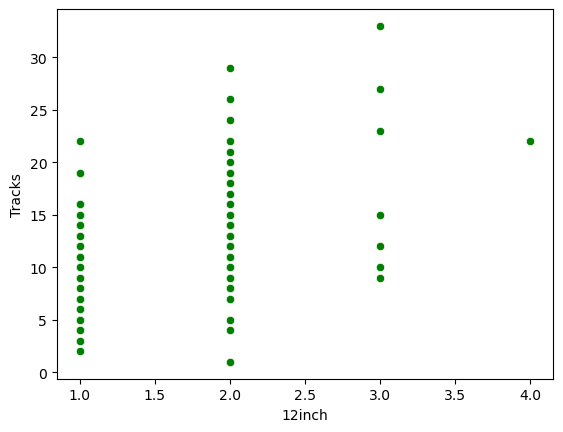

In [27]:
sns.scatterplot(x="12inch", y="Tracks",color="green", data=df)

In [28]:
from sklearn.preprocessing import LabelEncoder

unique_values = pd.concat([df['LP Colour'], df['Sleeve']]).unique()

label_encoder = LabelEncoder()

label_encoder.fit(unique_values)

df['LP Colour_encoded'] = label_encoder.transform(df['LP Colour'])
df['Sleeve_encoded'] = label_encoder.transform(df['Sleeve'])

correlation = df['LP Colour_encoded'].corr(df['Sleeve_encoded'])

print(df)
print(f'Correlation between Column1 and Column2: {correlation}')

              Artist                       Name  Date  LP Colour  \
0    Absent in Body                 Plague God   2022        red   
1       Afghan Whigs                  Gentlemen  1993     yellow   
2       Afghan Whigs                 Black Love  1996      black   
3       Afghan Whigs           How Do You Burn?  2022       pink   
4                AFI  Black Sails in the Sunset  1999     orange   
..               ...                        ...   ...        ...   
406       Youth Code         Yours, With Malice  2025       blue   
407     Zeal & Ardor             Stranger Fruit  2018     purple   
408     Zeal & Ardor           Wake of a Nation  2020  lightgrey   
409     Zeal & Ardor               Zeal & Ardor  2022      white   
410     Zeal & Ardor                      Greif  2024  lightgrey   

    Splatter/Marble  10inch  12inch Gatefold  Sleeve  Tracks        Label  \
0               NaN     NaN     1.0        Y   black      14      Relapse   
1               NaN     NaN  

In [29]:
df_yearly_counts = df['Date'].value_counts().sort_index().reset_index()
df_yearly_counts.columns = ['Date', 'occurrences']

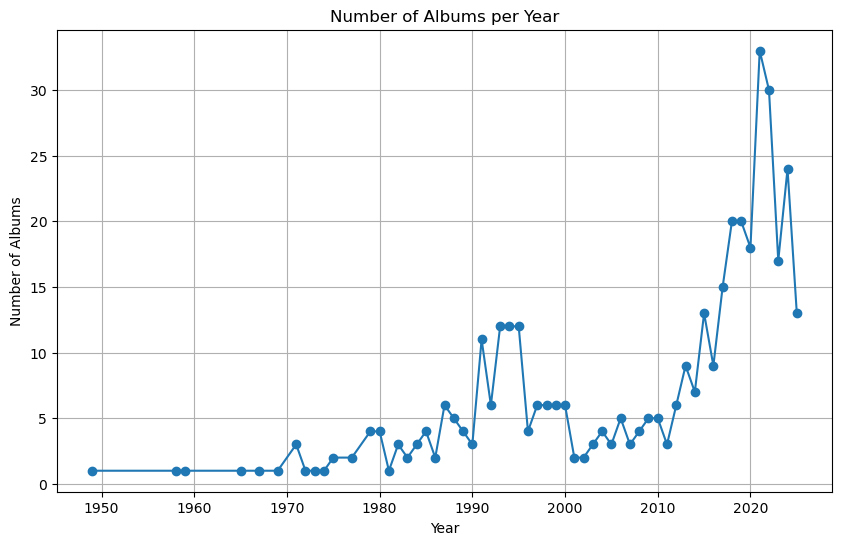

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(df_yearly_counts['Date'], df_yearly_counts['occurrences'], marker='o')
plt.title('Number of Albums per Year')
plt.xlabel('Year')
plt.ylabel('Number of Albums')
plt.grid(True)
plt.show()

In [31]:
import geopandas as gpd
import pycountry
import geodatasets

C:\Users\darre\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [32]:
country_counts = df['Country'].value_counts()
print(country_counts)

USA                166
England             81
Ireland             67
Sweden              17
Norway               9
France               8
Canada               7
Belgium              7
Scotland             6
Austria              5
Australia            5
Germany              4
Switzerland          4
Iceland              4
Finland              3
Italy                2
Russia               2
North Macedonia      1
Mongolia             1
Slovenia             1
Denmark              1
Wales                1
UK                   1
Spain                1
Netherlands          1
Mexico               1
Poland               1
Name: Country, dtype: int64


In [46]:

# Fit the ARIMA model
# ARIMA(p, d, q) parameters need to be set. Start with (1, 1, 1) as a trial.
model = ARIMA(df_yearly_counts['occurrences'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast the next 5 years
forecast = model_fit.forecast(steps=5)
forecast_years = pd.date_range(start=df.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')

# Plot the forecasted data
plt.figure(figsize=(10, 6))
plt.plot(df_yearly_counts.index, df_yearly_counts['occurrences'], label='Historical Data', marker='o')
plt.plot(forecast_years, forecast, label='Forecast', marker='x', linestyle='--')
plt.title('Yearly Quantity Forecast')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()

TypeError: unsupported operand type(s) for +: 'int' and 'DateOffset'

<Axes: xlabel='Date', ylabel='Tracks'>

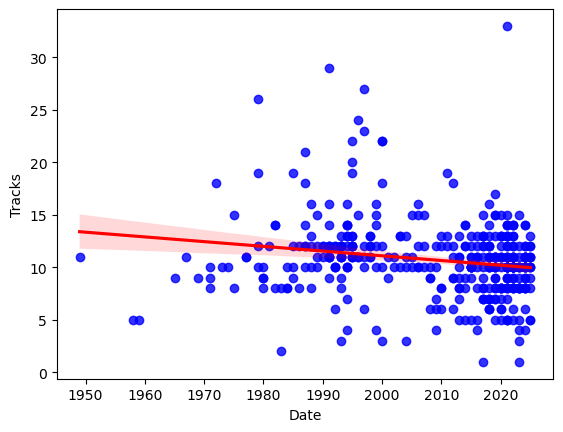

In [35]:
#sns.scatterplot(x="Date", y="Tracks",color="green", data=df)



sns.regplot(x='Date', y='Tracks', data=df, marker='o', color='blue', line_kws={"color": "red"})


In [45]:
df_names = df
df_names[0] = df_names[0].apply(lambda x: x if isinstance(x, str) else None).astype('string')


def modify_string(row):
    x = row[11]  # Get the value from column 11
    text = row[0]  # Get the value from column 0
    
    if not isinstance(text, str):  # Skip non-string values (like NaN or numbers)
        return text  
    
    words = text.split()  # Split column 0 into words
    
    if isinstance(x, (int, float)) and x > 1:  # Ensure x is a number and > 1
        return ' '.join(words[int(x)-1:])  # Remove the first (x-1) words
    
    return text  # If x <= 1, keep the original string

# Apply function to modify column 0

df_names[0] = df.apply(modify_string, axis=1)

KeyError: 0

In [36]:
df_names[0]

NameError: name 'df_names' is not defined

In [37]:
#count artist names beginning with each letter

unique_names = df_names.iloc[:, 0].unique()

print(unique_names)

NameError: name 'df_names' is not defined